# **Ejercicio 1**

Un analista hace un estudio químico y espera que el rendimiento de cierta sustancia se vea afectado por dos factores. Se realizan 17 experimentos cuyos datos se registran en el cuadro siguiente. Por experimentos similares, se sabe que los factores $x_1$ y $x_2$ no están relacionados; por ello, el analista decide utilizar un modelo de regresión lineal múltiple. Calcule el modelo de regresión y grafíquelo sobre las observaciones.

Tenemos:
* Variable respuesta: y (rendimiento)
* Predictores: $x_1$ y $x_2$
* Se hicieron 17 experimentos

El modelo propuesto es:

$y = β_0 + β_1 x_1 + β_2 x_2 + ϵ, ϵ ∼ N(0, σ^2) $

## Código en R

In [2]:
%load_ext rpy2.ipython

In [4]:
%%R
# Datos
datos <- data.frame(
  Experimento = 1:17,
  x1 = c(41.9, 43.4, 43.9, 44.5, 47.3, 47.5, 47.9, 50.2, 52.8, 53.2, 56.7, 57.0, 63.5, 64.3, 71.1, 77.0, 77.8),
  x2 = c(29.1, 29.3, 29.5, 29.7, 29.9, 30.3, 30.5, 30.7, 30.8, 30.9, 31.5, 31.7, 31.9, 32.0, 32.1, 32.5, 32.9),
  y  = c(251.3, 251.3, 248.3, 267.5, 273.0, 276.5, 270.3, 274.9, 285.0, 290.0, 297.0, 302.5, 304.5, 309.3, 321.7, 330.7, 349.0)
)
datos

   Experimento   x1   x2     y
1            1 41.9 29.1 251.3
2            2 43.4 29.3 251.3
3            3 43.9 29.5 248.3
4            4 44.5 29.7 267.5
5            5 47.3 29.9 273.0
6            6 47.5 30.3 276.5
7            7 47.9 30.5 270.3
8            8 50.2 30.7 274.9
9            9 52.8 30.8 285.0
10          10 53.2 30.9 290.0
11          11 56.7 31.5 297.0
12          12 57.0 31.7 302.5
13          13 63.5 31.9 304.5
14          14 64.3 32.0 309.3
15          15 71.1 32.1 321.7
16          16 77.0 32.5 330.7
17          17 77.8 32.9 349.0


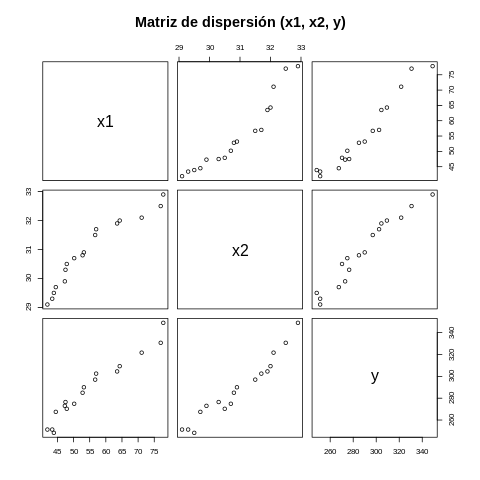

In [15]:
%%R
# Matriz de dispersión
pairs(datos[-1], main="Matriz de dispersión (x1, x2, y)")

In [6]:
%%R
# Ajuste del modelo
modelo <- lm(y ~ x1 + x2, data = datos)
summary(modelo)


Call:
lm(formula = y ~ x1 + x2, data = datos)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.0119 -4.0282 -0.3633  4.2258  8.3784 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) -151.7580    98.6751  -1.538  0.14635   
x1             1.2539     0.3878   3.233  0.00601 **
x2            12.0008     3.8480   3.119  0.00755 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.431 on 14 degrees of freedom
Multiple R-squared:  0.9688,	Adjusted R-squared:  0.9643 
F-statistic: 217.4 on 2 and 14 DF,  p-value: 2.875e-11



In [8]:
%%R
# Coeficientes
coef(modelo)



(Intercept)          x1          x2 
-151.758000    1.253893   12.000812 


In [9]:
%%R
# R^2 y R^2 ajustado usando broom
library(broom)
glance(modelo)[, c("r.squared", "adj.r.squared")]

# A tibble: 1 × 2
  r.squared adj.r.squared
      <dbl>         <dbl>
1     0.969         0.964


In [10]:
%%R
# Estimación de la varianza del error
sigma2 <- summary(modelo)$sigma^2
sigma2

[1] 29.50102


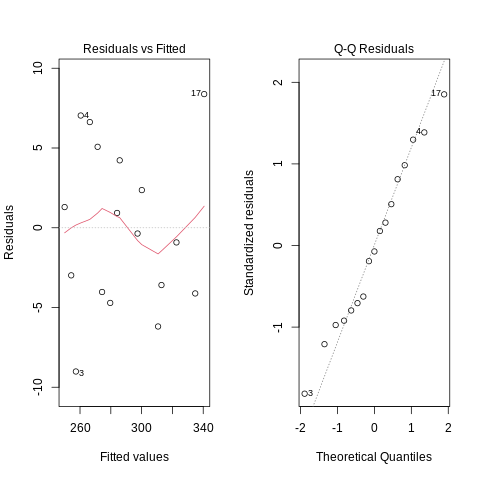

In [11]:
%%R
# Gráficos residuales vs ajustados y QQ-plot
par(mfrow=c(1,2))
plot(modelo, which=1) # Residuales vs ajustados
plot(modelo, which=2) # QQ-plot

## Código en Python

In [25]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Datos
datos = pd.DataFrame({
    "x1": [41.9, 43.4, 43.9, 44.5, 47.3, 47.5, 47.9, 50.2, 52.8, 53.2, 56.7, 57.0, 63.5, 64.3, 71.1, 77.0, 77.8],
    "x2": [29.1, 29.3, 29.5, 29.7, 29.9, 30.3, 30.5, 30.7, 30.8, 30.9, 31.5, 31.7, 31.9, 32.0, 32.1, 32.5, 32.9],
    "y":  [251.3, 251.3, 248.3, 267.5, 273.0, 276.5, 270.3, 274.9, 285.0, 290.0, 297.0, 302.5, 304.5, 309.3, 321.7, 330.7, 349.0]
})
datos

,x1,x2,y
0,41.9,29.1,251.3
1,43.4,29.3,251.3
2,43.9,29.5,248.3
3,44.5,29.7,267.5
4,47.3,29.9,273.0
5,47.5,30.3,276.5
6,47.9,30.5,270.3
7,50.2,30.7,274.9
8,52.8,30.8,285.0
9,53.2,30.9,290.0


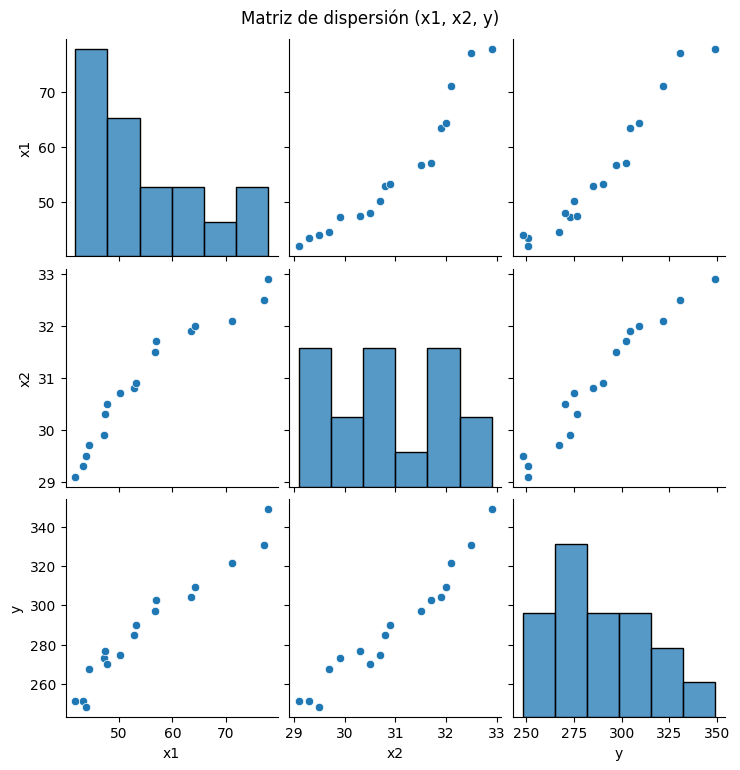

In [44]:
sns.pairplot(datos)
plt.suptitle("Matriz de dispersión (x1, x2, y)", y=1.02)
plt.show()

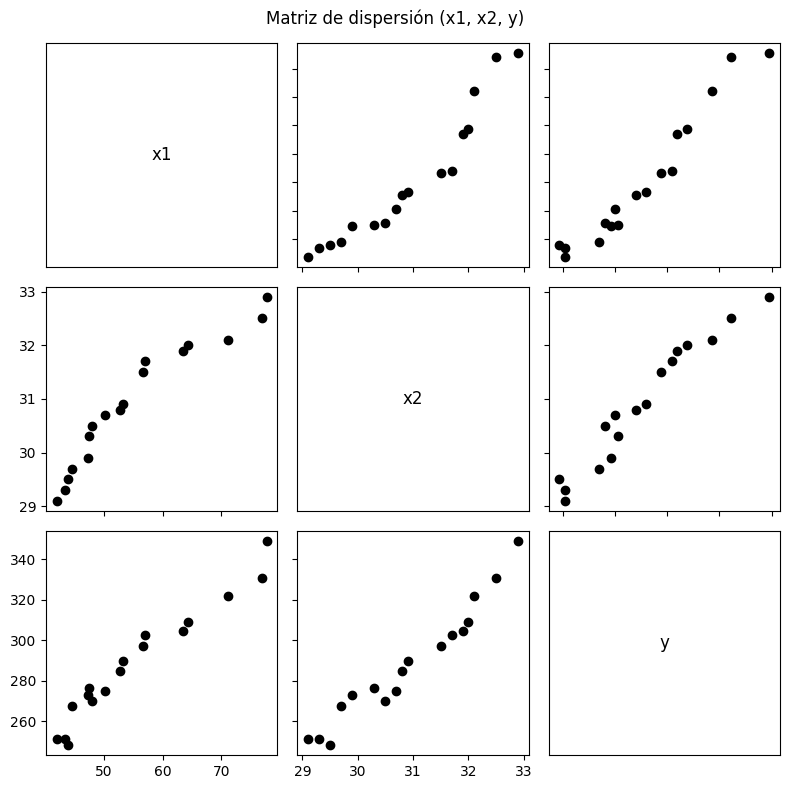

In [35]:
# Variables a graficar --> Parecida a la de R
vars = ["x1","x2","y"]
n = len(vars)

# Crear figura
fig, axes = plt.subplots(n, n, figsize=(8,8))

for i in range(n):
    for j in range(n):
        ax = axes[i,j]
        if i != j:
            # Scatter plot fuera de la diagonal
            ax.scatter(datos[vars[j]], datos[vars[i]], color='black')
        else:
            # Diagonal vacía
            ax.text(0.5, 0.5, vars[i], ha='center', va='center', fontsize=12)
            ax.set_xticks([])
            ax.set_yticks([])
        if i < n-1:
            ax.set_xticklabels([])
        if j > 0:
            ax.set_yticklabels([])

plt.suptitle("Matriz de dispersión (x1, x2, y)")
plt.tight_layout()
plt.show()


In [39]:
# Ajuste del modelo
X = sm.add_constant(datos[["x1", "x2"]])  # agrega intercepto
y = datos["y"]

modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     217.4
Date:                Mon, 25 Aug 2025   Prob (F-statistic):           2.87e-11
Time:                        07:46:51   Log-Likelihood:                -51.239
No. Observations:                  17   AIC:                             108.5
Df Residuals:                      14   BIC:                             111.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -151.7580     98.675     -1.538      0.1

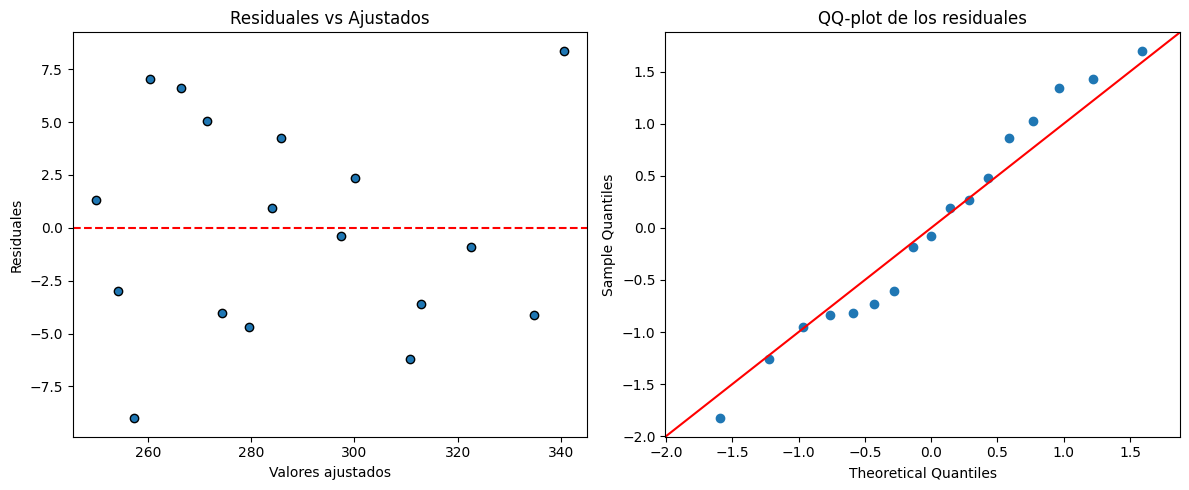

In [49]:
# Extraer residuales y valores ajustados
residuales = modelo.resid
ajustados = modelo.fittedvalues

# Configurar figura
plt.figure(figsize=(12, 5))

# 1. Residuales vs Ajustados
plt.subplot(1, 2, 1)
plt.scatter(ajustados, residuales, edgecolor='k')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores ajustados')
plt.ylabel('Residuales')
plt.title('Residuales vs Ajustados')

# 2. QQ-plot
plt.subplot(1, 2, 2)
sm.qqplot(residuales, line='45', fit=True, ax=plt.gca())
plt.title('QQ-plot de los residuales')

plt.tight_layout()
plt.show()


# **Ejercicio 2**

Repetir el ejemplo con los datos `datasets::trees` de R que proporciona mediciones del diámetro, altura y volumen de madera en 31 cerezos negros talados.

## Código en R

In [54]:
%%R
# Cargar dataset
data(trees)
trees

   Girth Height Volume
1    8.3     70   10.3
2    8.6     65   10.3
3    8.8     63   10.2
4   10.5     72   16.4
5   10.7     81   18.8
6   10.8     83   19.7
7   11.0     66   15.6
8   11.0     75   18.2
9   11.1     80   22.6
10  11.2     75   19.9
11  11.3     79   24.2
12  11.4     76   21.0
13  11.4     76   21.4
14  11.7     69   21.3
15  12.0     75   19.1
16  12.9     74   22.2
17  12.9     85   33.8
18  13.3     86   27.4
19  13.7     71   25.7
20  13.8     64   24.9
21  14.0     78   34.5
22  14.2     80   31.7
23  14.5     74   36.3
24  16.0     72   38.3
25  16.3     77   42.6
26  17.3     81   55.4
27  17.5     82   55.7
28  17.9     80   58.3
29  18.0     80   51.5
30  18.0     80   51.0
31  20.6     87   77.0


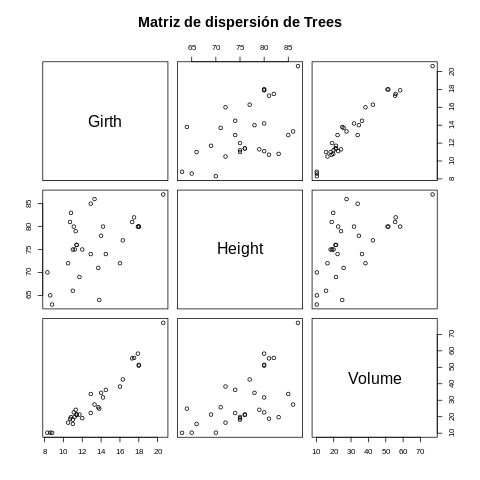

In [56]:
%%R
# Gráfico de dispersión
pairs(trees, main="Matriz de dispersión de Trees")

In [60]:
%%R
# Modelo de regresión lineal múltiple
# Supongamos que queremos predecir Volumen en función de Diámetro y Altura
modelo2 <- lm(Volume ~ Girth + Height, data=trees)
summary(modelo2)


Call:
lm(formula = Volume ~ Girth + Height, data = trees)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4065 -2.6493 -0.2876  2.2003  8.4847 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -57.9877     8.6382  -6.713 2.75e-07 ***
Girth         4.7082     0.2643  17.816  < 2e-16 ***
Height        0.3393     0.1302   2.607   0.0145 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.882 on 28 degrees of freedom
Multiple R-squared:  0.948,	Adjusted R-squared:  0.9442 
F-statistic:   255 on 2 and 28 DF,  p-value: < 2.2e-16



In [62]:
%%R
# Estimación de la varianza del error σ^2
sigma2_2 <- sum(residuals(modelo2)^2) / modelo2$df.residual
sigma2_2

[1] 15.06862


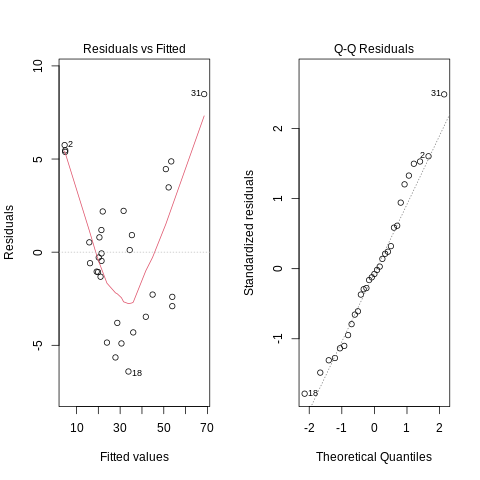

In [64]:
%%R
# Gráficos de diagnóstico
par(mfrow=c(1,2))
plot(modelo2, which=1) # Residuales vs ajustados
plot(modelo2, which=2) # QQ-plot

## Código en Python

In [65]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml

In [69]:
# Crear el dataset con tus datos de R
data = {
    "Girth":[8.3, 8.6, 8.8, 10.5, 10.7, 10.8, 11.0, 11.0, 11.1, 11.2,
             11.3, 11.4, 11.4, 12.0, 12.9, 12.9, 13.3, 13.7, 13.8, 14.0,
             14.2, 14.5, 16.0, 16.3, 17.3, 17.5, 17.9, 18.0, 18.0, 20.6,
             20.6],
    "Height":[70, 65, 63, 72, 81, 83, 66, 75, 80, 75, 79, 75, 76, 78, 69,
              74, 86, 75, 80, 75, 82, 80, 83, 88, 85, 80, 90, 85, 85, 80,
              87],
    "Volume":[10.3, 10.3, 10.2, 16.4, 18.8, 19.7, 15.6, 18.2, 22.6, 19.9,
              24.2, 21.0, 21.4, 21.3, 15.1, 21.1, 28.2, 21.0, 21.3, 19.1,
              22.2, 33.8, 27.8, 25.3, 33.9, 33.4, 36.2, 28.0, 34.1, 36.0,
              32.8]}
trees = pd.DataFrame(data)
trees

,Girth,Height,Volume
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8
5,10.8,83,19.7
6,11.0,66,15.6
7,11.0,75,18.2
8,11.1,80,22.6
9,11.2,75,19.9


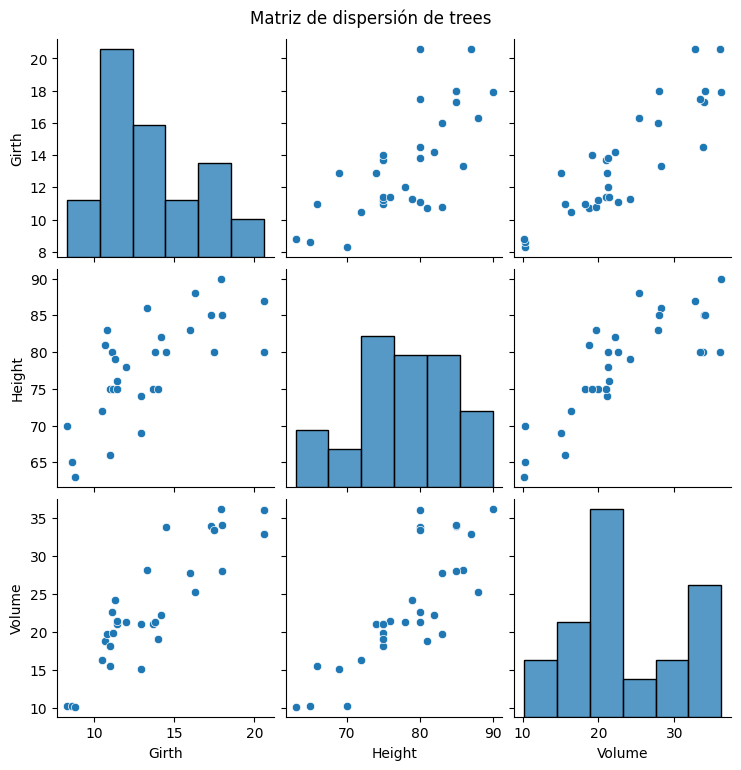

In [71]:
# Gráfico de dispersión
sns.pairplot(trees)
plt.suptitle("Matriz de dispersión de trees", y=1.02)
plt.show()

In [74]:
# Modelo de regresión lineal múltiple (Volume ~ Girth + Height)
X = trees[['Girth', 'Height']]
X = sm.add_constant(X)  # Agregar intercepto
y = trees['Volume']

modelo2 = sm.OLS(y, X).fit()
print(modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     77.15
Date:                Mon, 25 Aug 2025   Prob (F-statistic):           4.06e-12
Time:                        08:09:20   Log-Likelihood:                -77.296
No. Observations:                  31   AIC:                             160.6
Df Residuals:                      28   BIC:                             164.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -27.8475      7.224     -3.855      0.0

In [76]:
# Estimación de la varianza del error σ^2
sigma2 = sum(modelo2.resid**2) / modelo.df_resid
print("Estimación σ^2:", sigma2)

Estimación σ^2: 9.494770566844378


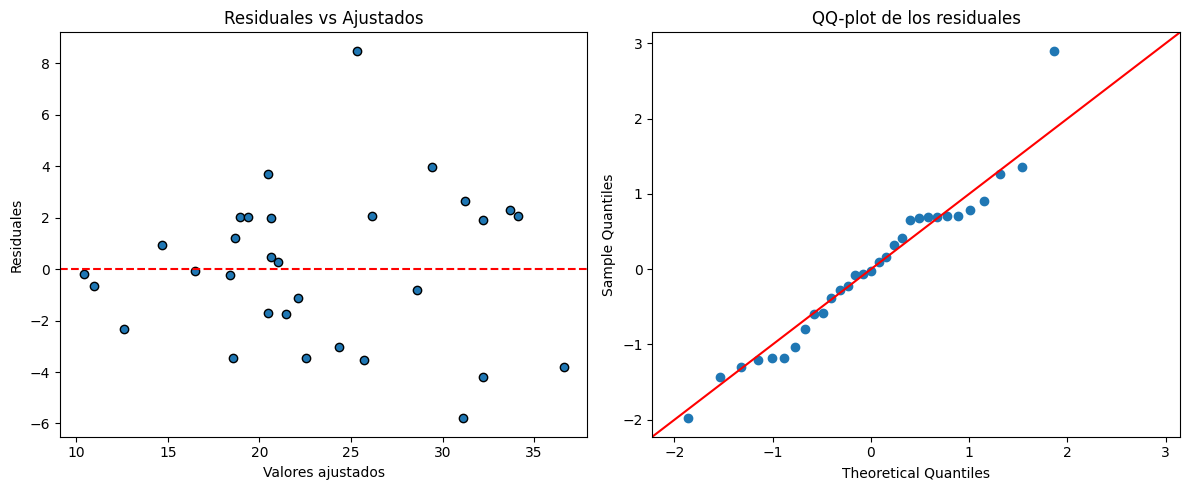

In [78]:
# Extraer residuales y valores ajustados
residuales2 = modelo2.resid
ajustados2 = modelo2.fittedvalues

# Configurar figura
plt.figure(figsize=(12, 5))

# 1. Residuales vs Ajustados
plt.subplot(1, 2, 1)
plt.scatter(ajustados2, residuales2, edgecolor='k')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores ajustados')
plt.ylabel('Residuales')
plt.title('Residuales vs Ajustados')

# 2. QQ-plot
plt.subplot(1, 2, 2)
sm.qqplot(residuales2, line='45', fit=True, ax=plt.gca())
plt.title('QQ-plot de los residuales')

plt.tight_layout()
plt.show()

# Comparaciones

| Característica                                 | R                                                          | Python                                                    |
| --------------------------------------- | ---------------------------------------------------------- | --------------------------------------------------------- |
| **Facilidad para modelos estadísticos** | Muy directa: `lm()` + `summary()` te da todo en una línea | Un poco más largo (`statsmodels.OLS`) |
| **Gráficas rápidas**                    | `pairs()`, `plot()` fáciles y rápidas                     | `seaborn` y `matplotlib` más personalizables  |
| **Varianza del error**                  | `summary(modelo)$sigma^2` directo                         | `modelo.mse_resid`                                       |
|              |
